# Strelka morphotypes

In [2]:
import pandas as pd

blocks_gdf = pd.read_pickle('./../../data/saint_petersburg/blocks.pickle')

In [3]:
from blocksnet.analysis.indicators import calculate_density_indicators 

density_df = calculate_density_indicators(blocks_gdf)
density_df.head()

,site_area,footprint_area,build_floor_area,living_area,non_living_area,fsi,gsi,mxi,l,osr,share_living,share_non_living
0,0.032316,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,inf,NaN,NaN
1,137101.088247,69.018103,69.018103,0.000000,69.018103,0.000503,0.000503,0.000000,1.000000,1985.451134,0.000000,1.000000
2,95239.084434,5853.863274,6106.759644,4197.188633,1909.571011,0.064120,0.061465,0.687302,1.043202,14.637095,0.716995,0.326207
3,125919.330984,4214.828165,4375.483259,3033.795607,1341.687653,0.034748,0.033472,0.693362,1.038117,27.815100,0.719791,0.318326
4,169860.164494,13392.846325,31242.324144,20860.965881,10381.358263,0.183930,0.078846,0.667715,2.332762,5.008184,1.557620,0.775142


In [6]:
from blocksnet.analysis.morphotypes import get_strelka_morphotypes

strelka_df = get_strelka_morphotypes(density_df)
strelka_df.head()

,l,fsi,mxi,morphotype
0,0.000000,0.000000,0.000000,NaN
1,1.000000,0.000503,0.000000,low-rise non-residential
2,1.043202,0.064120,0.687302,individual residential
3,1.038117,0.034748,0.693362,individual residential
4,2.332762,0.183930,0.667715,low-rise model


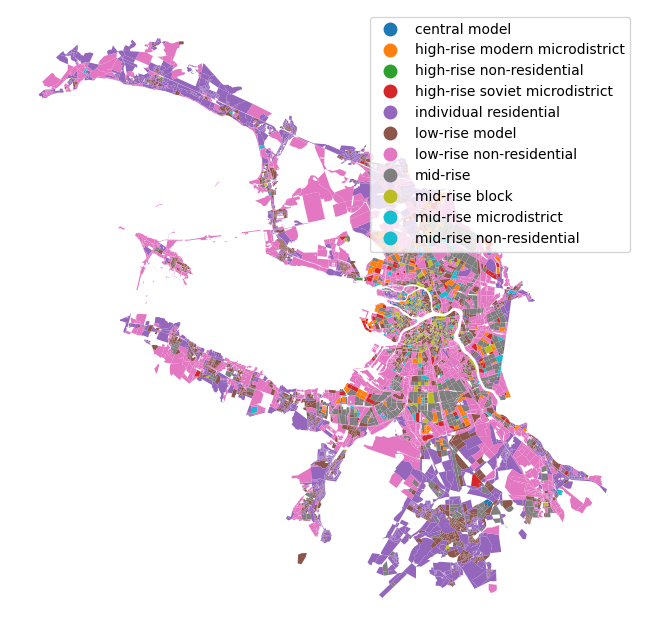

In [8]:
blocks_gdf[['geometry']].join(strelka_df).plot(column='morphotype', legend=True, figsize=(10,8)).set_axis_off()